# Import and Inspect the Data

python
Copy code


In [38]:
import pandas as pd

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')

# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head(), "\n")

print("Transactions Data:")
print(transactions.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

# Check the dimensions of each dataset
print(f"Customers: {customers.shape}")
print(f"Transactions: {transactions.shape}")
print(f"Products: {products.shape}")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68   

Products Data:
  ProductID    

# Handle Missing Data

In [39]:
# Check for missing values in each dataset
print("Missing values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing values in Transactions:")
print(transactions.isnull().sum(), "\n")

print("Missing values in Products:")
print(products.isnull().sum(), "\n")

# Example: Handling missing values in 'CustomerID' in Transactions
transactions = transactions.dropna(subset=['CustomerID'])


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 



# Data Cleaning and Preprocessing

In [41]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Remove duplicates
customers = customers.drop_duplicates()
transactions = transactions.drop_duplicates()
products = products.drop_duplicates()

# Standardize column names (optional)
customers.columns = customers.columns.str.strip().str.lower()
transactions.columns = transactions.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()

#Descriptive Statistics

In [42]:
# Summary statistics for numerical columns in Transactions
print(transactions.describe(), "\n")

# Summary statistics for numerical columns in Customers
print(customers.describe(), "\n")

# Summary statistics for numerical columns in Products
print(products.describe(), "\n")


                     transactiondate     quantity   totalvalue       price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639 

       customerid      customername         region  signupdate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3 

      

#Data Visualization

<ipython-input-43-90142f2eab5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


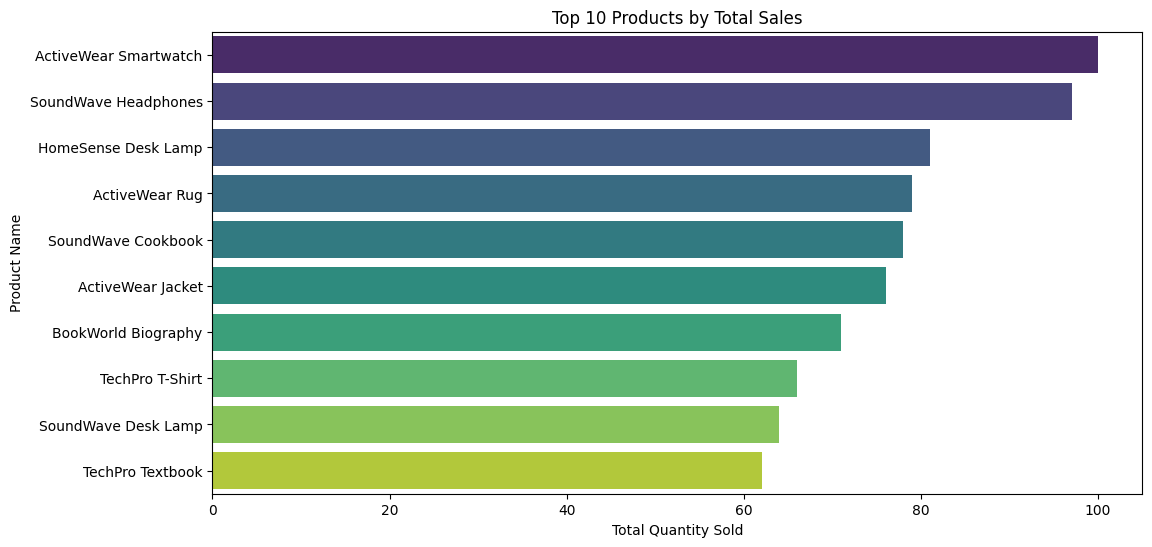

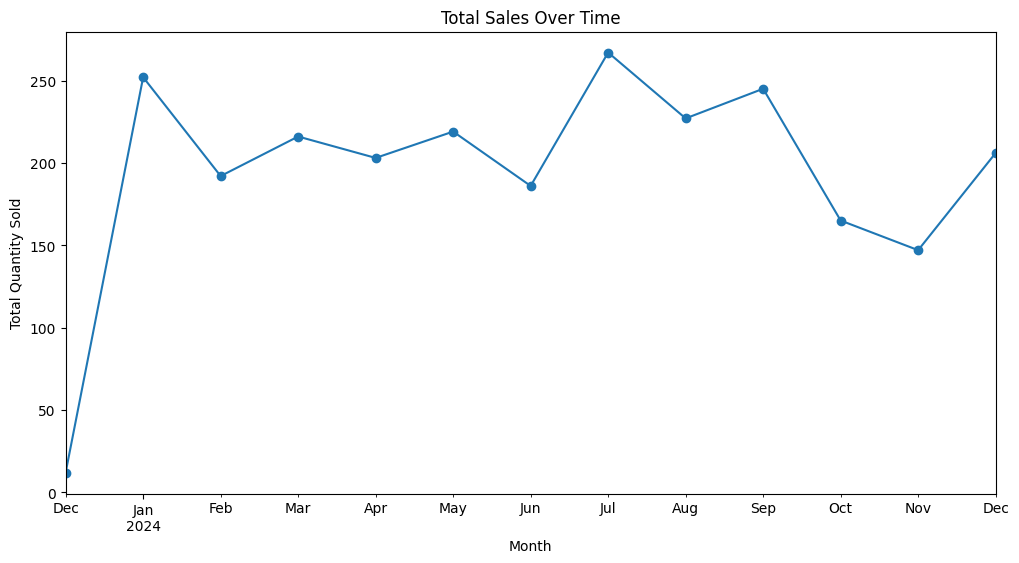

In [43]:
data['transactiondate'] = pd.to_datetime(data['transactiondate'])

# Total sales per product
product_sales = data.groupby('productname')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Sales over time
data['invoice_month'] = data['transactiondate'].dt.to_period('M')
monthly_sales = data.groupby('invoice_month')['quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


#Univariate Analysis

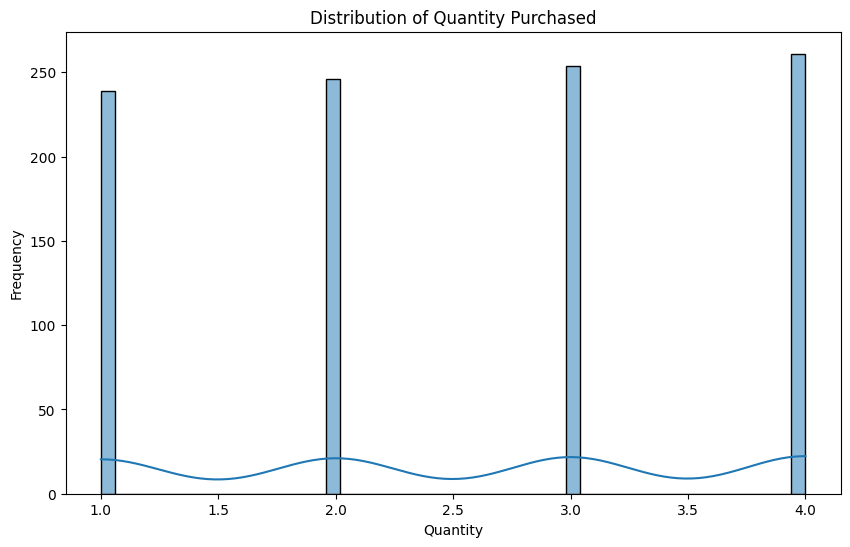

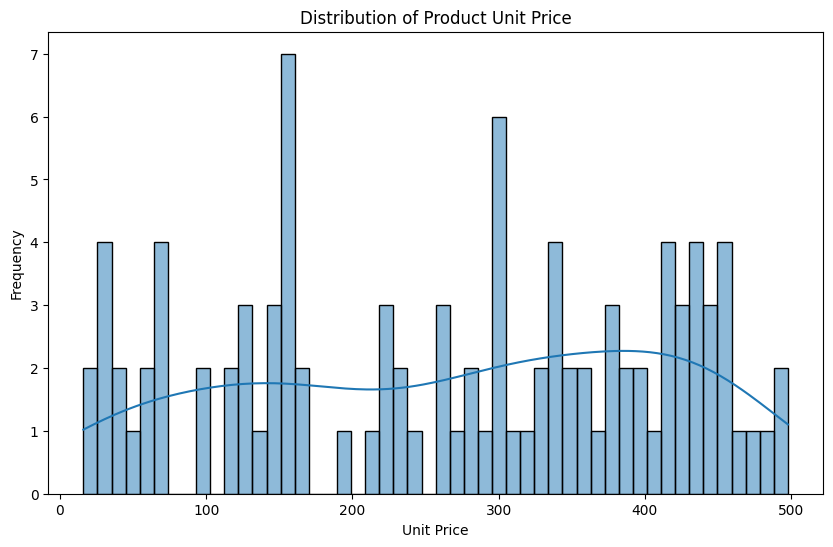

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Quantity' in Transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions['quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'UnitPrice' in Products
# Changed 'unitprice' to 'unitprice' to match the lowercased column name
plt.figure(figsize=(10, 6))
# Access the column using the lowercased name 'unitprice'
sns.histplot(products['price'], bins=50, kde=True)
plt.title('Distribution of Product Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

#Bivariate and Multivariate Analysis

python
Copy
Edit


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactionid    1000 non-null   object 
 1   customerid       1000 non-null   object 
 2   productid        1000 non-null   object 
 3   transactiondate  1000 non-null   object 
 4   quantity         1000 non-null   int64  
 5   totalvalue       1000 non-null   float64
 6   price_x          1000 non-null   float64
 7   customername     1000 non-null   object 
 8   region           1000 non-null   object 
 9   signupdate       1000 non-null   object 
 10  productname      1000 non-null   object 
 11  category         1000 non-null   object 
 12  price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


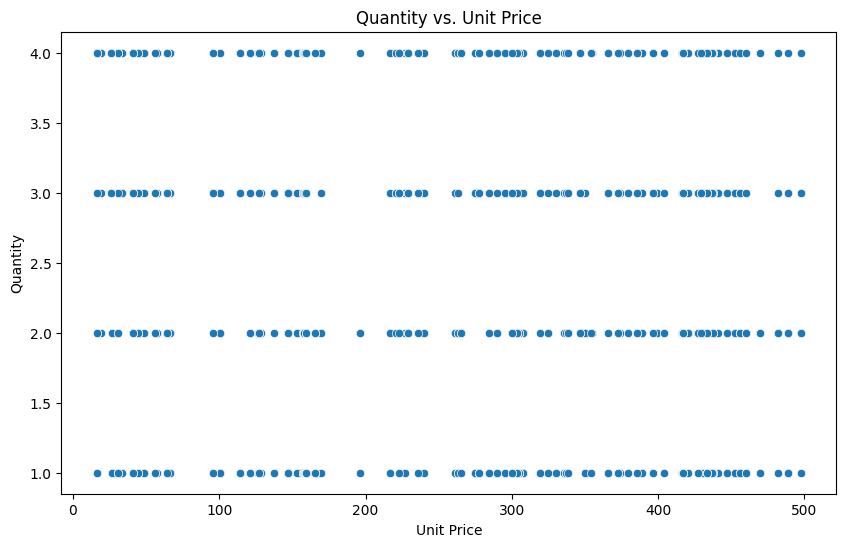

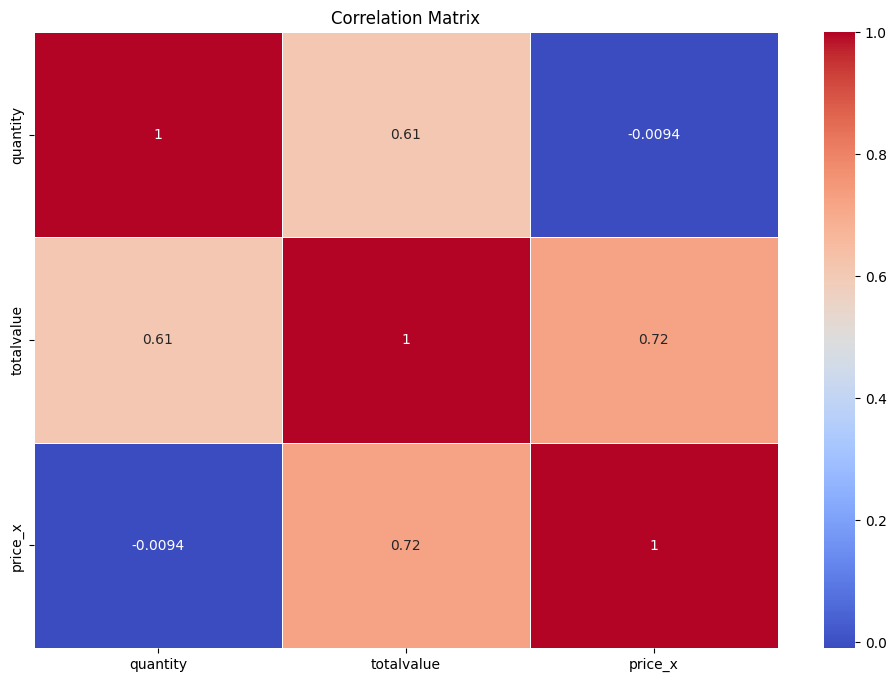

In [31]:
# Merge datasets for comprehensive analysis
data = transactions.merge(customers, on='customerid').merge(products, on='productid')

# Scatter plot: Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_x', y='quantity', data=data)
plt.title('Quantity vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

# Correlation matrix
corr_matrix = data[["quantity", "totalvalue", "price_x"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
